# Sales Insights.

## Introduction.

This project seeks to analyze the performance of an Indian company that sells electronic components throughout India. To carry out the analysis we have the sales from 2017 to 2020. The purpose of the analysis is for the head of the company to know how 2020 impacted the company's performance, which possible alerts he should take into account for 2021 and which initiatives he should focus on this year.

## Methodology.

This document is an adaptation of a sales analysis project i found in YouTube. Please click on [link](https://youtu.be/hhZ62IlTxYs) if you want to analyze it.

In the original project, the author was looking to create a Dashboard in Power BI, while I am using the information mainly to practice in Python.

Although initially, the idea was that both versions were going to have the same results, with Python I was able to perform a better data cleaning than the author of the project could do in Power BI and that makes our numbers differ. I also made some changes in the monetary units because is easier for me to be working with the dollar than the Hindu ruppi as a currency.

To perform the information analysis, I performed the following steps:
+ <a href="#Importing-libraries-&-Information.">Importing libraries & Information.</a>
+ <a href="#Cleaning-&-merging-tables.">Cleaning & merging tables.</a>
+ <a href="#Transforming-the-data.">Transforming the data.</a>
+ <a href="#Checking-the-table-&-creating-its-summary-table.">Checking the table & creating its summary table</a>
+ <a href="#Preeliminar-analysis.">Preeliminar analysis.</a>
+ <a href="#Detailed-analysis.">Detailed analysis.</a>
+ <a href="#Last-conclusions.">Last conclusions.</a>

## Importing libraries & Information.

For this project, I will use the pandas, matplolib, and NumPy libraries. The information comes from a database that contains several tables, to be able to use them, I downloaded them and use them as .csv files. I leave below a image of how the database looked in MySQL.

This is the transaction table.

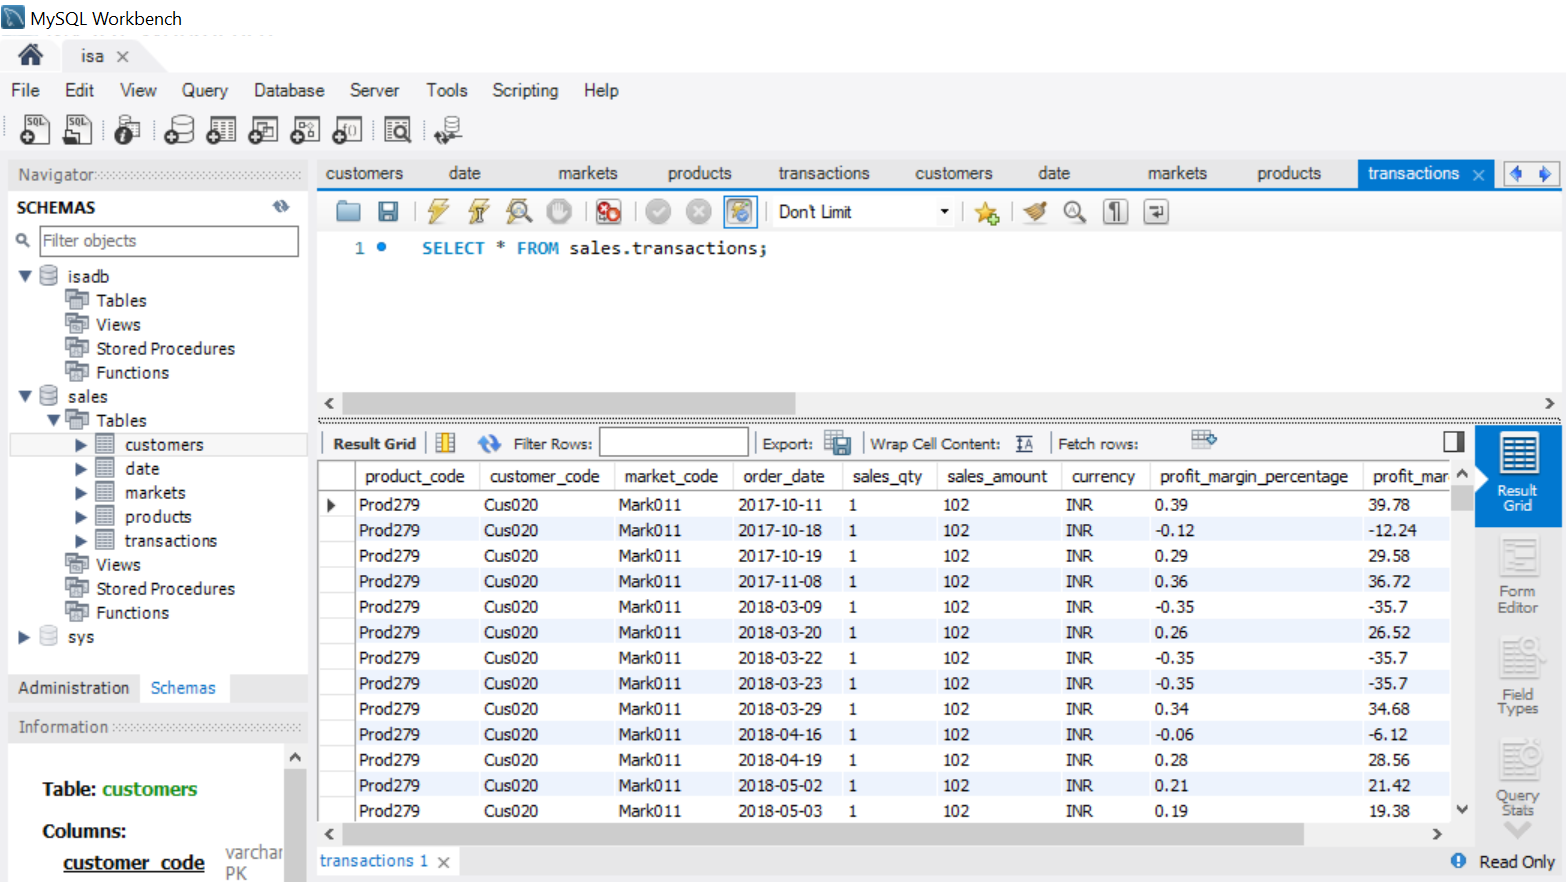

To avoid making the document unnecessarily long, i will only show this table, but the structure of the data can be seen below, when uncommenting the instructions that accompany the different tables. For the moment let's import the libraries, download and read the tables.

In [ ]:
#Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read the different csv & check the basic structure.
trans=pd.read_csv("transactions.csv")
#print("trans titles")
#print(trans.head(1))
#print(trans.info())
#print("-------")
cust=pd.read_csv("Customers.csv")
#print("cust titles")
#print(cust.head(1))
#print(cust.info())
#print("-------")
date=pd.read_csv("date.csv")
#print("date titles")
#print(date.head(1))
#print(date.info())
#print("-------")
mark=pd.read_csv("markets.csv")
#print("mark titles")
#print(mark.head(1))
#print(mark.info())
#print("-------")
prod=pd.read_csv("products.csv")
#print("prod titles")
#print(prod.head(1))
#print(prod.info())
#print("-------")

Once I have all the information in the notebook, let's start with the analysis and data mergin.

<a href="#Methodology.">Back to top.</a>

## Cleaning & merging tables.

The objective of this section is to join all the tables into one. To achieve this, I will need to modify the names of some column titles and also eliminate some columns to try to make the table as readable as possible.

In [ ]:
#Fix a column name in cust.
cust["customer_name"]=cust["custmer_name"]
cust=cust.drop(["custmer_name"],axis=1)
print(cust.head())

In [ ]:
# Merge trans with cust on column "customer_code".
trans1=trans.merge(cust, on="customer_code", how="inner")
#print(trans1)
#print(trans1.info())

In [ ]:
# Add column "date" & eliminate column "order_date".
trans1["date"]=trans1["order_date"]
trans1=trans1.drop(["order_date"],axis=1)
print(trans1.head())

In [ ]:
# Merge trans1 with date on column "date".
trans2=trans1.merge(date, on="date", how="inner")
print(trans2.info())

In [ ]:
# Add column "market_code" & eliminate column "markets_code".
mark["market_code"]=mark["markets_code"]
mark=mark.drop(["markets_code"],axis=1)

In [ ]:
# Merge trans2 with mark on column "market_code".
trans3=trans2.merge(mark, on="market_code", how="inner")
print(trans3.info())

In [ ]:
# Merge trans3 with prod on column "product_code".
trans4=trans3.merge(prod, on="product_code", how="inner")
print(trans4.info())

In [ ]:
# Eliminate columns "cy_date" & "date_yy_mmm".
sales=trans4.drop(["cy_date","date_yy_mmm"],axis=1)
print(sales.head())

Next I document the order in which the old columns are left, since from now on the table will be treated as a numpy object

|Location|Column name|
|:---------:|:----------:|
|0|product_code 
|1|customer_code 
|2|market_code  
|3|sales_qty  
|4|sales_amount 
|5|currency 
|6|profit_margin_percentage  
|7|profit_margin  
|8|cost_price 
|9|customer_type
|10|customer_name        
|11|date  
|12|year 
|13|month_name     
|14|market_name
|15|zone 
|16|product_type

Once I have a unified table, I need to make some column modifications to help me better analyze the information. These modifications include unifying the sales units and creating the "Revenue" column.

<a href="#Methodology.">Back to top.</a>

## Transforming the data.

Now I will do the transformations.

In [ ]:
#Change dataframe to numpy.
salesnp=sales.to_numpy()
print(salesnp[:1,:])

In [ ]:
# Create column "new_amount (USD)" in sales & make equal to "sales_amount".
sales["new_amount (USD)"] = sales["sales_amount"]
#Except when currency is equal to INR
mask = sales["currency"] == "INR"
# In this case must be divided by 75
sales.loc[mask,"new_amount (USD)"] = sales.loc[mask,"new_amount (USD)"]/75

# Create column "new_profit (USD)" in sales & make equal to "profit_margin".
sales["new_profit (USD)"] = sales["profit_margin"]
#Except when currency is equal to INR
mask = sales["currency"] == "INR"
# In this case must be divided by 75
sales.loc[mask,"new_profit (USD)"] = sales.loc[mask,"new_profit (USD)"]/75

# Verify
print(sales["sales_amount"][0])
print(sales["sales_amount"][0]/75)
print(sales["new_amount (USD)"][0])
print("---")
print(sales["profit_margin"][0])
print(sales["profit_margin"][0]/75)
print(sales["new_profit (USD)"][0])
print(sales.head(1))

In [ ]:
#Create column "revenues"
sales["revenues"]=sales["sales_qty"]*sales["new_amount (USD)"]

In [ ]:
#Display number using floats
pd.options.display.float_format = '{:.2f}'.format
# Use "year" column with date format
sales["year"]=pd.to_datetime(sales["year"],format="%Y").dt.year

Once I have finished with the transformations, the time has come to review the table. for this.

<a href="#Methodology.">Back to top.</a>

## Checking the table & creating its summary table.

In this section, I will request that the first 5 lines of the table be printed and that a summary table be created.

In [ ]:
#Check the data.
sales1=sales.head()
print(sales1)
#sales1=sales.to_excel("sales2.xlsx")

In [ ]:
sales.describe()

Once we have the details in a summary table, I am going to analyze the evolution of finances over the years. For this we will first see the quantity of objects sold, revenues and profit.

<a href="#Methodology.">Back to top.</a>

## Preeliminar analysis.

To begin the analysis, I will create a dictionary that summarizes all commercial information and then,  make different plots to see how it evolves, finally will check if is possible to reach any preliminary conclusions.

In [ ]:
sales2017=sales[sales["year"]==2017]
sales2018=sales[sales["year"]==2018]
sales2019=sales[sales["year"]==2019]
sales2020=sales[sales["year"]==2020]
sales2017_c=sales2017[sales2017["zone"]=="Central"]
sales2017_n=sales2017[sales2017["zone"]=="North"]
sales2017_s=sales2017[sales2017["zone"]=="South"]
sales2018_c=sales2018[sales2018["zone"]=="Central"]
sales2018_n=sales2018[sales2018["zone"]=="North"]
sales2018_s=sales2018[sales2018["zone"]=="South"]
sales2019_c=sales2019[sales2019["zone"]=="Central"]
sales2019_n=sales2019[sales2019["zone"]=="North"]
sales2019_s=sales2019[sales2019["zone"]=="South"]
sales2020_c=sales2020[sales2020["zone"]=="Central"]
sales2020_n=sales2020[sales2020["zone"]=="North"]
sales2020_s=sales2020[sales2020["zone"]=="South"]
resume={"Year":[2017,2018,2019,2020],
        "Sum quantity sales":[sales2017["sales_qty"].sum(),sales2018["sales_qty"].sum(),sales2019["sales_qty"].sum(),sales2020["sales_qty"].sum()],
        "Sum quantity sales central":[sales2017_c["sales_qty"].sum(),sales2018_c["sales_qty"].sum(),sales2019_c["sales_qty"].sum(),sales2020_c["sales_qty"].sum()],
        "Sum quantity sales north":[sales2017_n["sales_qty"].sum(),sales2018_n["sales_qty"].sum(),sales2019_n["sales_qty"].sum(),sales2020_n["sales_qty"].sum()],
        "Sum quantity sales south":[sales2017_s["sales_qty"].sum(),sales2018_s["sales_qty"].sum(),sales2019_s["sales_qty"].sum(),sales2020_s["sales_qty"].sum()],
        "Sum profit":[sales2017["new_profit (USD)"].sum(),sales2018["new_profit (USD)"].sum(),sales2019["new_profit (USD)"].sum(),sales2020["new_profit (USD)"].sum()],
        "Sum profit central":[sales2017_c["new_profit (USD)"].sum(),sales2018_c["new_profit (USD)"].sum(),sales2019_c["new_profit (USD)"].sum(),sales2020_c["new_profit (USD)"].sum()],
        "Sum profit north":[sales2017_n["new_profit (USD)"].sum(),sales2018_n["new_profit (USD)"].sum(),sales2019_n["new_profit (USD)"].sum(),sales2020_n["new_profit (USD)"].sum()],
        "Sum profit south":[sales2017_s["new_profit (USD)"].sum(),sales2018_s["new_profit (USD)"].sum(),sales2019_s["new_profit (USD)"].sum(),sales2020_s["new_profit (USD)"].sum()],
        "Sum Revenues":[((sales2017["revenues"].sum())/1000000),((sales2018["revenues"].sum())/1000000),((sales2019["revenues"].sum())/1000000),((sales2020["revenues"].sum())/1000000)],
        "Sum Revenues central":[((sales2017_c["revenues"].sum())/1000000),((sales2018_c["revenues"].sum())/1000000),((sales2019_c["revenues"].sum())/1000000),((sales2020_c["revenues"].sum())/1000000)],
        "Sum Revenues north":[((sales2017_n["revenues"].sum())/1000000),((sales2018_n["revenues"].sum())/1000000),((sales2019_n["revenues"].sum())/1000000),((sales2020_n["revenues"].sum())/1000000)],
        "Sum Revenues south":[((sales2017_s["revenues"].sum())/1000000),((sales2018_s["revenues"].sum())/1000000),((sales2019_s["revenues"].sum())/1000000),((sales2020_s["revenues"].sum())/1000000)],}
resume=pd.DataFrame.from_dict(resume)
print(resume)

The dictionary is called "resume" and firstly I will use it to see how many items were sold in the 3 regions.

In [ ]:
#Create the plot & its components.
fig = plt.figure(figsize=(8,6))
plt.plot(resume["Year"], resume["Sum quantity sales"], c='#ac92eb', label="Sum", linewidth=5)
plt.plot(resume["Year"], resume["Sum quantity sales central"], c='#a0d568', label="Central", linewidth=3)
plt.plot(resume["Year"], resume["Sum quantity sales north"], c='#4fc1e8', label="North", linewidth=3)
plt.plot(resume["Year"], resume["Sum quantity sales south"], c='#ffce54', label="South", linewidth=3)
# Create some format.
plt.legend(loc="upper left")
plt.xlabel("Year")
plt.ylabel("Sales quantity")
plt.xlim(2017, 2020)
plt.ylim(0, 900000)
plt.title("Quantity of sales per Year")
#Show the plot.
plt.show()

We can see that 2018 was the year in which the greatest number of objects were sold, after this, the number of items sold decreased.

Now we will see how these changes on the quantity of sales is translated into Revenues.

In [ ]:
#Create the plot & its components.
fig = plt.figure(figsize=(8,6))
plt.plot(resume["Year"], resume["Sum Revenues"], c='#ac92eb', label="Sum", linewidth=3)
plt.plot(resume["Year"], resume["Sum Revenues central"], c='#a0d568', label="Central", linewidth=3)
plt.plot(resume["Year"], resume["Sum Revenues north"], c='#4fc1e8', label="North", linewidth=3)
plt.plot(resume["Year"], resume["Sum Revenues south"], c='#ffce54', label="South", linewidth=3)
# Format.
plt.legend(loc="upper left")
plt.xlabel("Year")
plt.ylabel("Sales quantity")
plt.xlim(2017, 2020)
plt.title("Revenues per Year")
# Show the plot.
plt.show()

Although we keep seeing that the year of higher profits is still 2018, in 2019 the 3 regions had similar income levels. After that all have a decrease in their income levels, being the northern zone the one that suffers the least in 2020.

As a final preliminary step, let's see how these Revenues translates into the company's profit over the years.

In [ ]:
# Create the plot & its components.
fig = plt.figure(figsize=(8,6))
plt.plot(resume["Year"], resume["Sum profit"], c='#ac92eb', label="Sum", linewidth=3)
plt.plot(resume["Year"], resume["Sum profit central"], c='#a0d568', label="Central", linewidth=3)
plt.plot(resume["Year"], resume["Sum profit north"], c='#4fc1e8', label="North", linewidth=3)
plt.plot(resume["Year"], resume["Sum profit south"], c='#ffce54', label="South", linewidth=3)
# Format.
plt.legend(loc="upper left")
plt.xlabel("Year")
plt.ylabel("Profit (USD)")
plt.xlim(2017, 2020)
plt.ylim(0, 80000)
plt.title("Profit per Year")
# Show the plot.
plt.show()

In the plot we can see that the northern and central regions have similar profit levels between 2018, 2019 and 2020, while the southern area remains relatively stable over the years with a slight trend towards growththrough the whole period, but nevertheless leaves very low profit levels.

<a href="#Methodology.">Back to top.</a>

## Detailed analysis.

Now that we have a general idea of the company's finances, let's take a closer look at how customers and products behave. Let's start by seeing the sales channels.

In [ ]:
#Define the info.
sum_sales_e=sales[sales["customer_type"]=="E-Commerce"]
sum_sales_b=sales[sales["customer_type"]=="Brick & Mortar"]
sum_ecom=sum_sales_e["new_profit (USD)"].sum()
sum_brick=sum_sales_b["new_profit (USD)"].sum()
# Define & format the plot.
bar_positions = ['E-Commerce', 'Brick & Mortar']
bar_heights = [sum_ecom, sum_brick]
barElement=plt.bar(bar_positions, bar_heights,color="#ac92eb")
for element in barElement:
        plt.text(element.get_x()+.25,element.get_height()/2,int(element.get_height()),color="white",fontsize=16)
plt.title("Profit Per Customer type")
plt.ylabel("Profit (USD)")
plt.xlabel("Customer type")
#Show the plot.
plt.show()

We can see that the "Brick & Mortar" method almost doubles the  "E-commerce" channel, however let's look in more detail to see if we can get a trend.

In [ ]:
# Define the info.
sales2017_e=sales2017[sales2017["customer_type"]=="E-Commerce"]
sales2017_b=sales2017[sales2017["customer_type"]=="Brick & Mortar"]
sales2018_e=sales2018[sales2018["customer_type"]=="E-Commerce"]
sales2018_b=sales2018[sales2018["customer_type"]=="Brick & Mortar"]
sales2019_e=sales2019[sales2019["customer_type"]=="E-Commerce"]
sales2019_b=sales2019[sales2019["customer_type"]=="Brick & Mortar"]
sales2020_e=sales2020[sales2020["customer_type"]=="E-Commerce"]
sales2020_b=sales2020[sales2020["customer_type"]=="Brick & Mortar"]
#Define & format the plot.
resume={"Year":[2017,2018,2019,2020],
        "Sum_ecomm":[sales2017_e["sales_qty"].sum(),sales2018_e["sales_qty"].sum(),sales2019_e["sales_qty"].sum(),sales2020_e["sales_qty"].sum()],
        "Sum_brick":[sales2017_b["sales_qty"].sum(),sales2018_b["sales_qty"].sum(),sales2019_b["sales_qty"].sum(),sales2020_b["sales_qty"].sum()]}
        fig = plt.figure(figsize=(8,6))
plt.plot(resume["Year"], resume["Sum_ecomm"], c='#ac92eb', label="E-commerce", linewidth=3)
plt.plot(resume["Year"], resume["Sum_brick"], c='#a0d568', label="Brick & Mortar", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("Year")
plt.ylabel("Profit (USD)")
plt.xlim(2017, 2020)
plt.ylim(0, 700000)
plt.title("Profit per Year according to customer type")
# Show the plot
plt.show()

As we can see, **E-commerce** channel has a **fairly stable trend over the years**. Although in 2020 there was a decrease in profits, this channel had a much smaller decrease than Brick & Mortar. This may be a first clue as to where efforts should go in 2021. Let´s make a last zoom on our clients to see if we can find anything else.

In [ ]:
# Define the basic table.
customers=sales.pivot_table(values='new_profit (USD)', index= "customer_name", aggfunc=np.sum)
cust_des=customers.sort_values(by=["new_profit (USD)"],ascending=False)
# Define the tables with the important information.
cust_pos=cust_des[cust_des["new_profit (USD)"]>=0]
cust_neg=cust_des[cust_des["new_profit (USD)"]<=0]
# Print the tables.
print(cust_pos)
print(cust_pos.count())
print("------------")
print(cust_neg)
print(cust_neg.count())

As we can see there are certain clients that generate a lot of profits, others generate profits close to the average, others few profits and a last group generates losses. Therefore, I recommend to look for more information about customers to **see if it is possible to create customer profiles** and thus generate more effective sales strategies.

Let's see now how profits behave when comparing the type of products we sell.

In [ ]:
#Define the info.
sum_sales_d=sales[sales["product_type"]=="Distribution\r"]
sum_sales_o=sales[sales["product_type"]=="Own Brand\r"]
sum_dist=sum_sales_d["new_profit (USD)"].sum()
sum_own=sum_sales_o["new_profit (USD)"].sum()
# Define & format the plot.
bar_positions = ['Distribution', 'Own Brand']
bar_heights = [sum_dist, sum_own]
barElement=plt.bar(bar_positions, bar_heights,color="#ac92eb")
for element in barElement:
    plt.text(element.get_x()+.25,element.get_height()/2,int(element.get_height()),color="white",fontsize=16)
plt.title("Profit Per Product type")
plt.ylabel("Profit (USD)")
plt.xlabel("Product type")
# Show the plot
plt.show()

In the plot we can see that our brand is selling much better than the Distribution products, however let's look in more detail to learn more.

In [ ]:
#Define the info.
sales2017_d=sales2017[sales2017["product_type"]=='Distribution\r']
sales2017_o=sales2017[sales2017["product_type"]=="Own Brand\r"]
sales2018_d=sales2018[sales2018["product_type"]=='Distribution\r']
sales2018_o=sales2018[sales2018["product_type"]=="Own Brand\r"]
sales2019_d=sales2019[sales2019["product_type"]=='Distribution\r']
sales2019_o=sales2019[sales2019["product_type"]=="Own Brand\r"]
sales2020_d=sales2020[sales2020["product_type"]=='Distribution\r']
sales2020_o=sales2020[sales2020["product_type"]=="Own Brand\r"]

resume={"Year":[2017,2018,2019,2020],
        "Sum_dist":[sales2017_d["sales_qty"].sum(),sales2018_d["sales_qty"].sum(),sales2019_d["sales_qty"].sum(),sales2020_d["sales_qty"].sum()],
        "Sum_own":[sales2017_o["sales_qty"].sum(),sales2018_o["sales_qty"].sum(),sales2019_o["sales_qty"].sum(),sales2020_o["sales_qty"].sum()]}
# Define & format the plot.        
fig = plt.figure(figsize=(8,6))
plt.plot(resume["Year"], resume["Sum_dist"], c='#ac92eb', label="Distribution", linewidth=3)
plt.plot(resume["Year"], resume["Sum_own"], c='#a0d568', label="Own Brand", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("Year")
plt.ylabel("Profit (USD)")
plt.xlim(2017, 2020)
plt.ylim(0, 700000)
plt.title("Profit per Year according to product type")
# Show the plot.
plt.show()

As we can see in the graph, much of the **drop in profits is due to the products of our own brand**, this gives us a second clue about the strategy we should take. Let´s see if is possible to know which products are generating a decrease in profits.

In [ ]:
# Define the basic table.
products=sales.pivot_table(values='new_profit (USD)', index= "product_code", aggfunc=np.sum)
# Define the tables with the important information.
prod_asc=products.sort_values(by=["new_profit (USD)"],ascending=False)
prod_des=products.sort_values(by=["new_profit (USD)"],ascending=True)
# Print the tables.
print(prod_asc[prod_asc["new_profit (USD)"]>=0])
print("---------")
print(prod_des[prod_des["new_profit (USD)"]<=0])

We have discovered an important fact, **a third of the products we are selling are generating losses**. I recommend taking this information into account when creating customer profiling, since it may be the case that some of the products that generate loss individually are critical for a customer that generates a lot of profit.

<a href="#Methodology.">Back to top.</a>

## Last conclusions.

After reviewing the information we can reach certain conclusions:
* 2020 negatively affected sales to the North and Central regions however, the South zone had a slight increase in profits.
* Our products have had a significant drop in profit during 2020.
* The "store" type sales had a very negative impact on profits in 2020 however, the drop was less important in the e-commerce channel.
* Clients seem to be differentiated by the level of profit, so it is recommended to investigate a little more to discover how we can increase our profits without negatively impacting our relationship with them.


<a href="#Methodology.">Back to top.</a>